<a href="https://colab.research.google.com/github/triercasa/Homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes_data=load_diabetes()

In [3]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes_data.data.shape

(442, 10)

In [6]:
diabetes_data.target.shape

(442,)

In [7]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [17]:
import pandas as pd

In [44]:
pd.set_option('display.precision', 4)

In [45]:
pd.set_option('display.max_columns', 9)

In [38]:
pd.set_option('display.width', None)

In [39]:
diabetes_data_df=pd.DataFrame(diabetes_data,columns=diabetes_data.feature_names)

In [40]:
diabetes_data_df['DiseaseProgression']=pd.Series(diabetes_data.target)

In [56]:
diabetes_data_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,DiseaseProgression
0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,151.0
1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75.0
2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,141.0
3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,206.0
4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,135.0


In [57]:
diabetes_data_df.describe()

,DiseaseProgression
count,442.0000
mean,152.1335
std,77.0930
min,25.0000
25%,87.0000
50%,140.5000
75%,211.5000
max,346.0000


In [47]:
sample_df=diabetes_data_df.sample(frac=0.1,random_state=17)

In [48]:
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns

In [51]:
sns.set(font_scale=2)

In [52]:
sns.set_style('whitegrid')

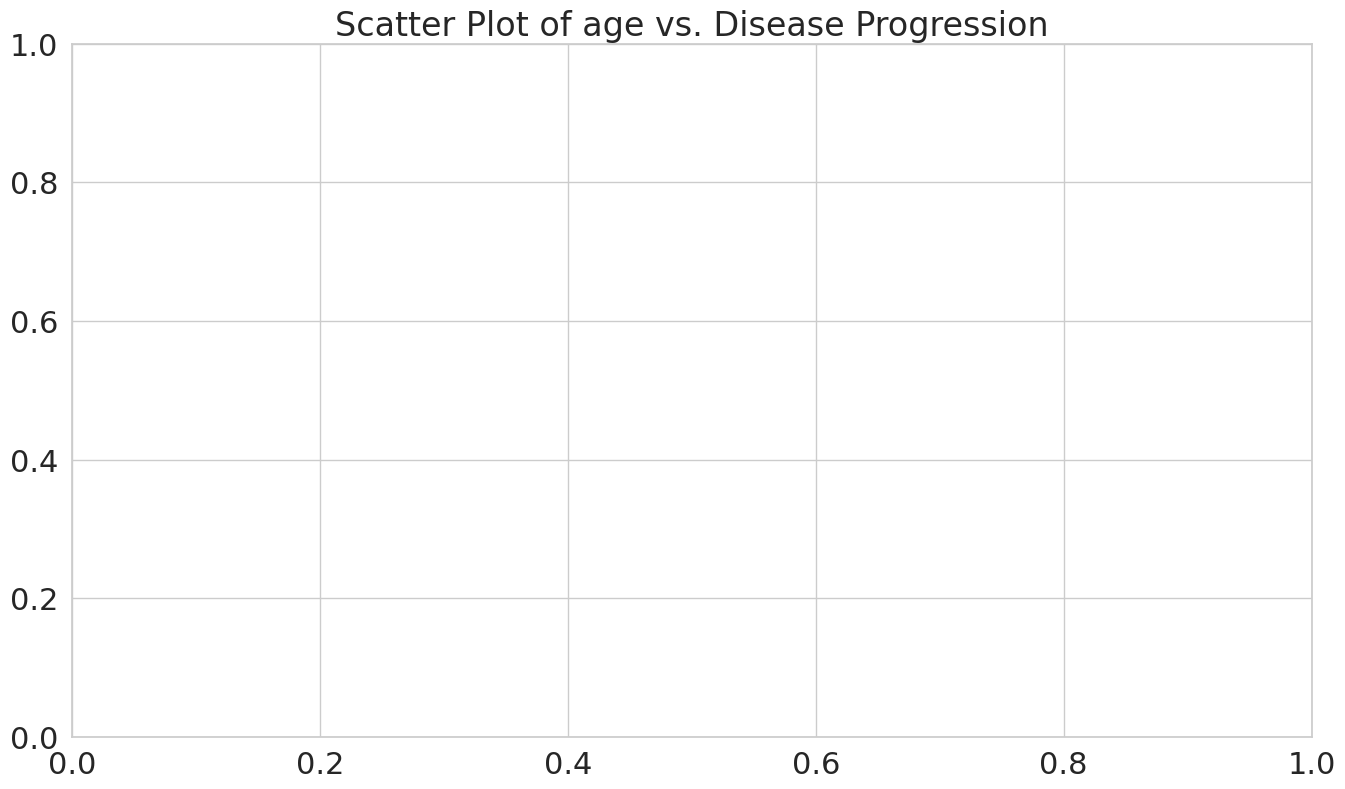

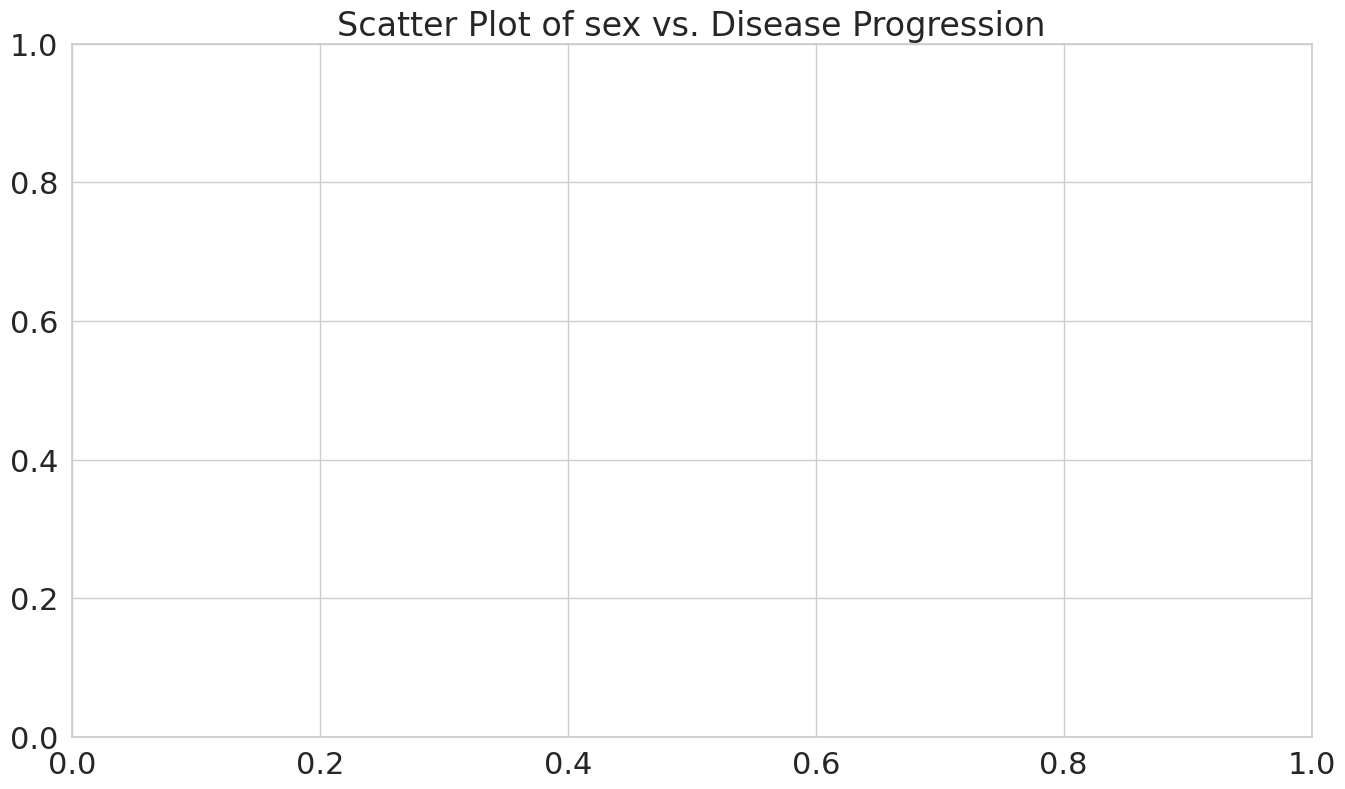

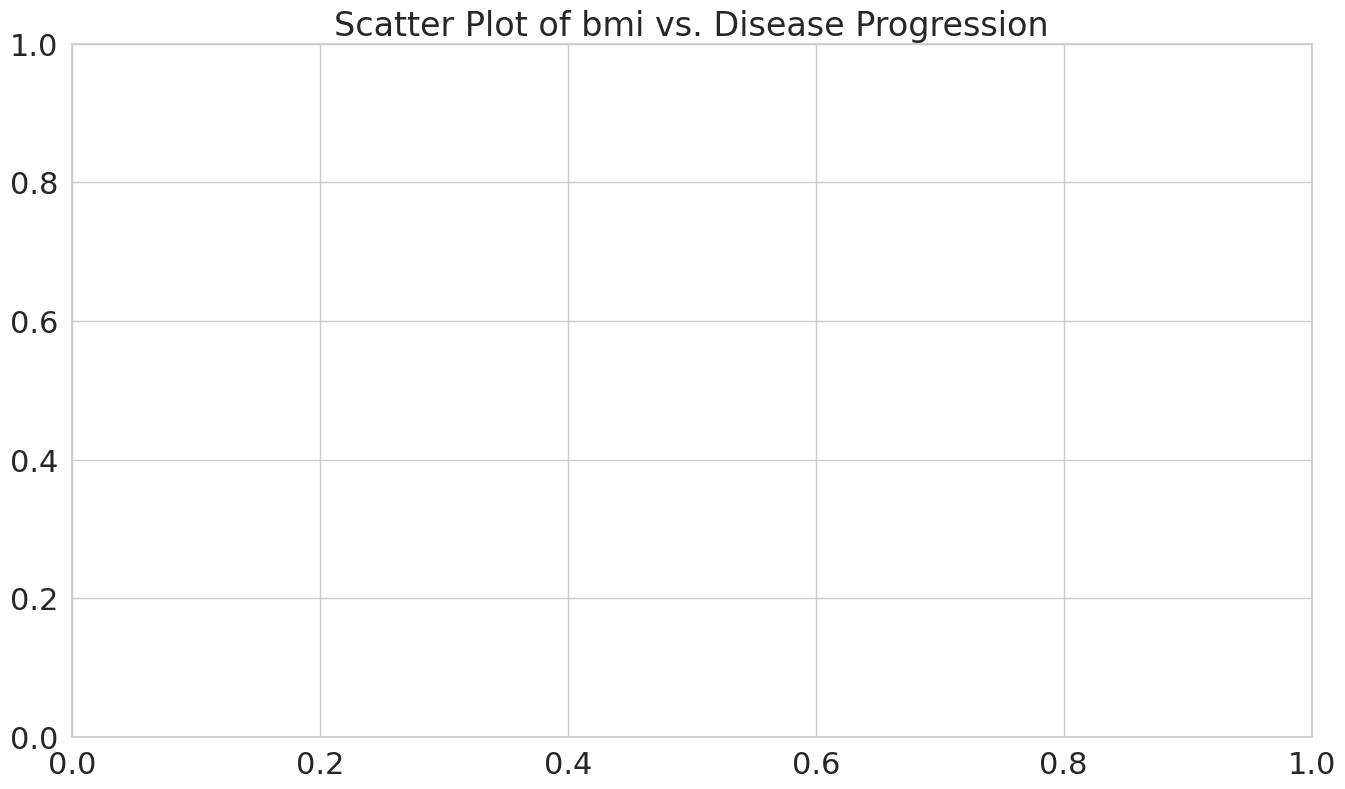

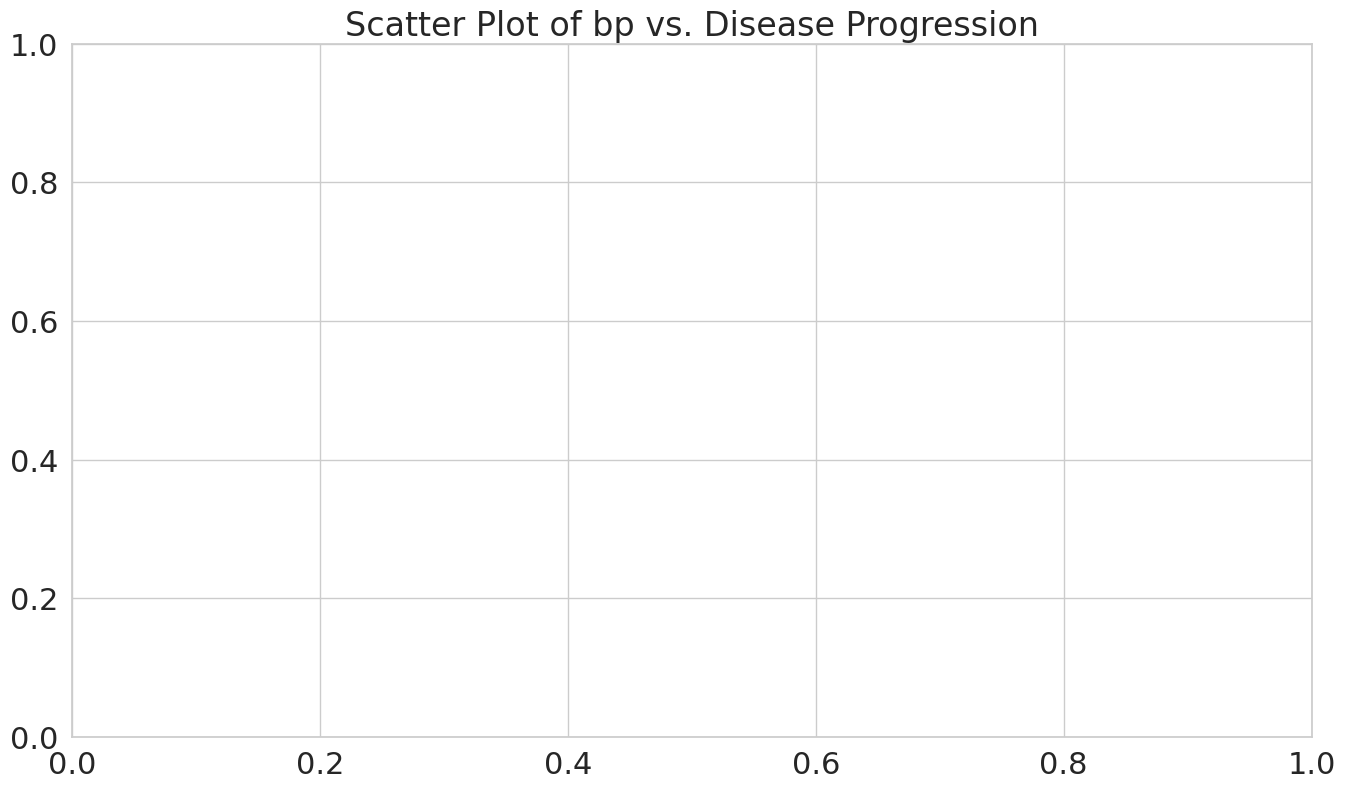

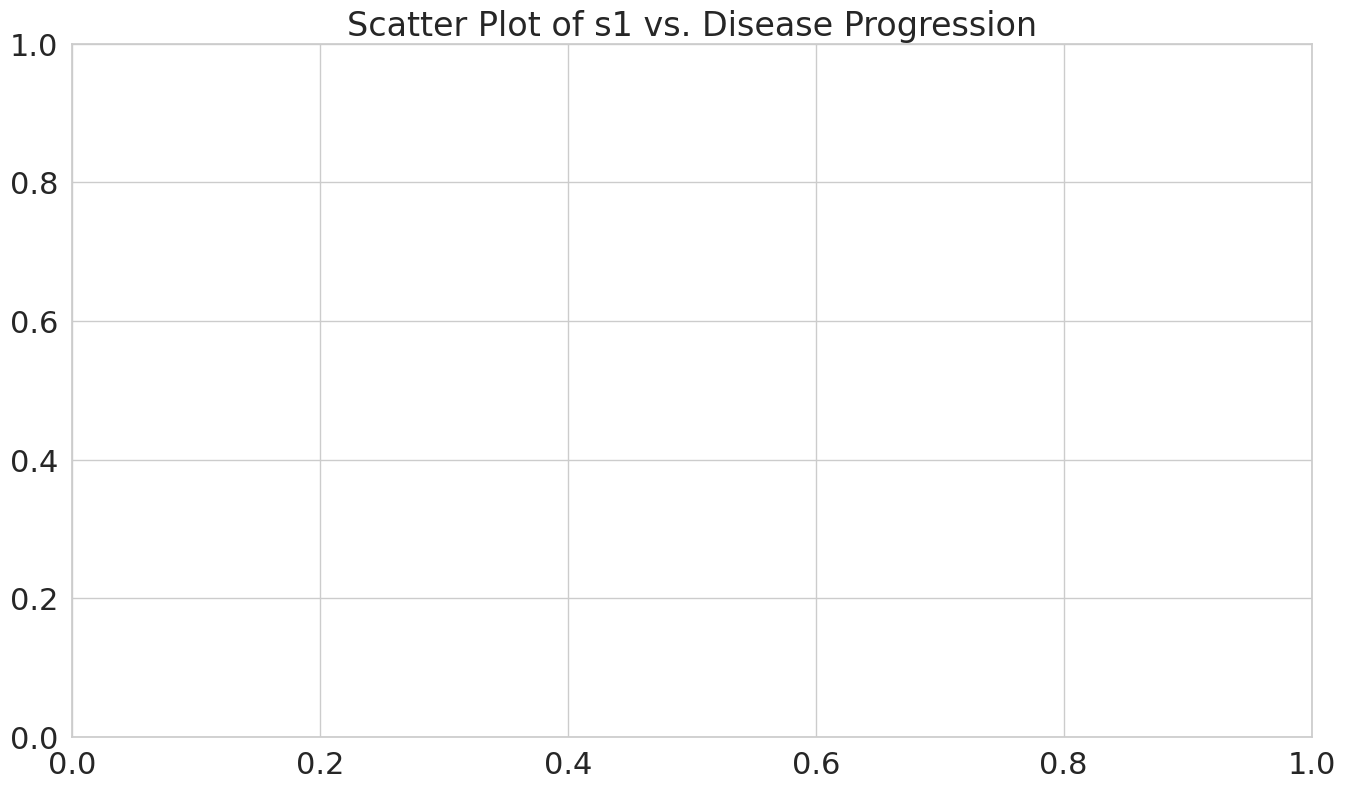

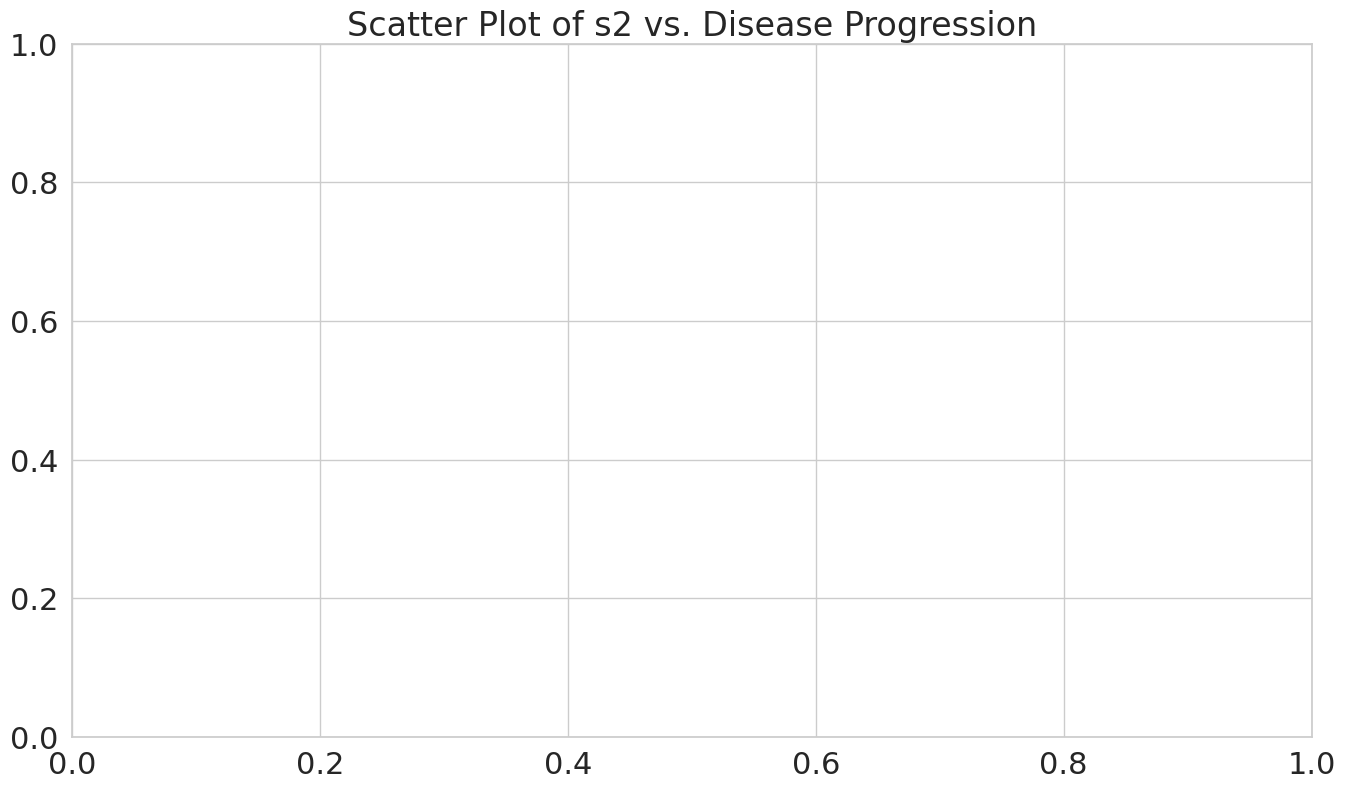

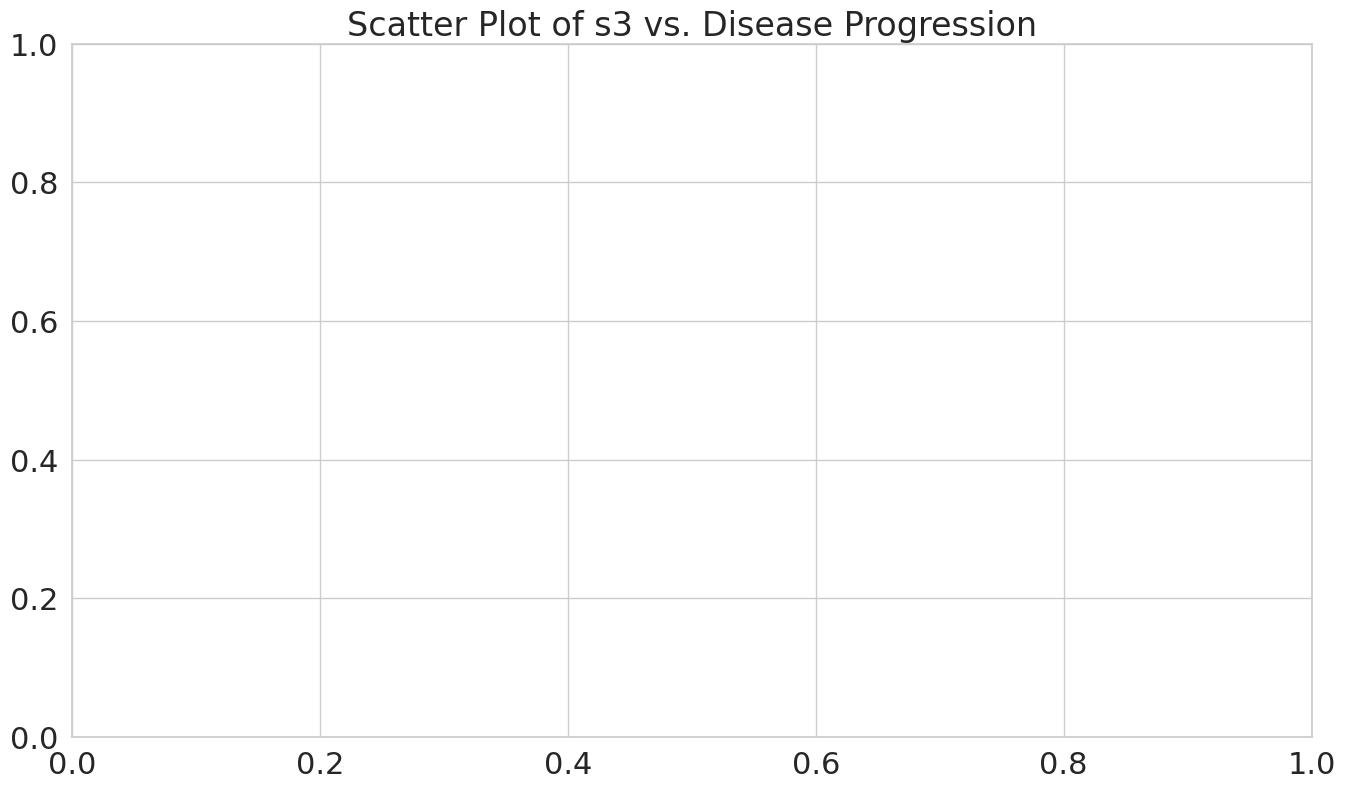

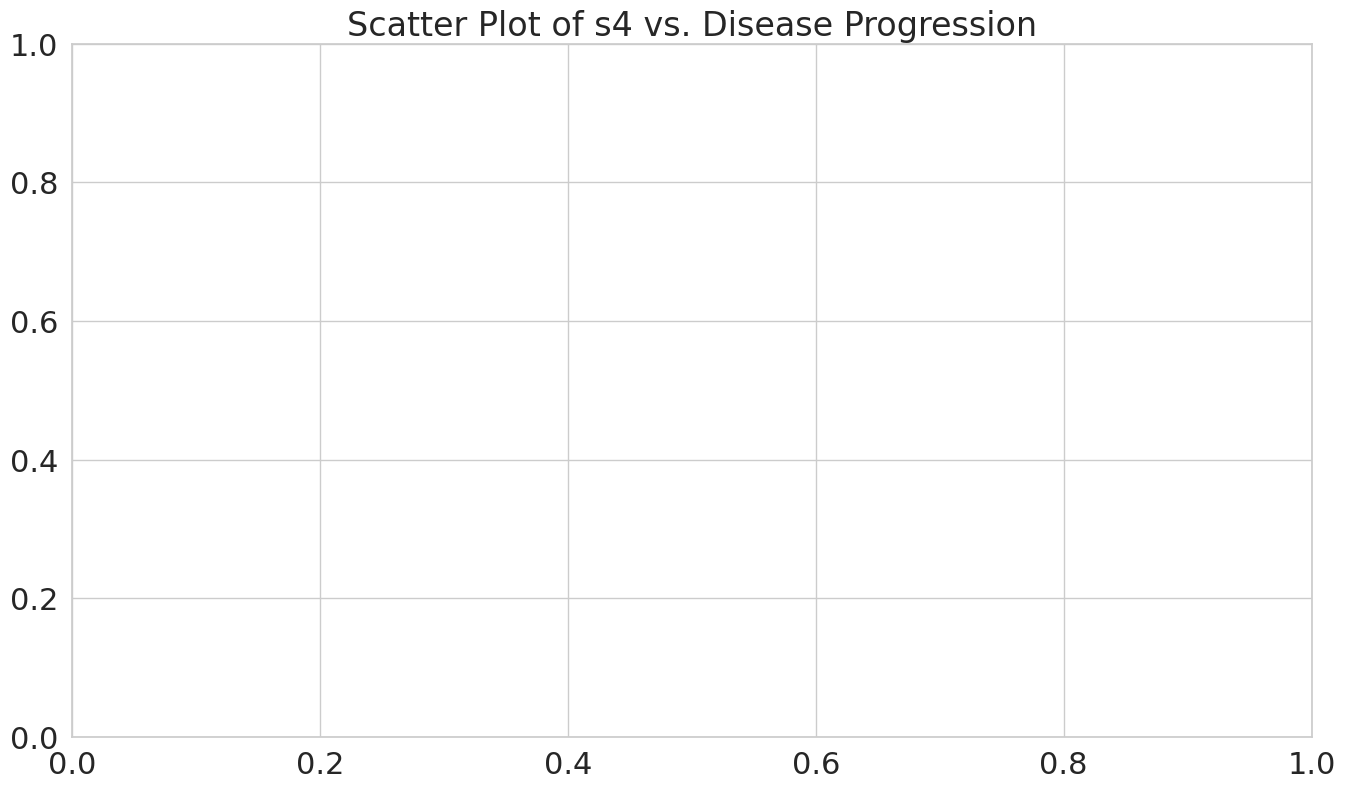

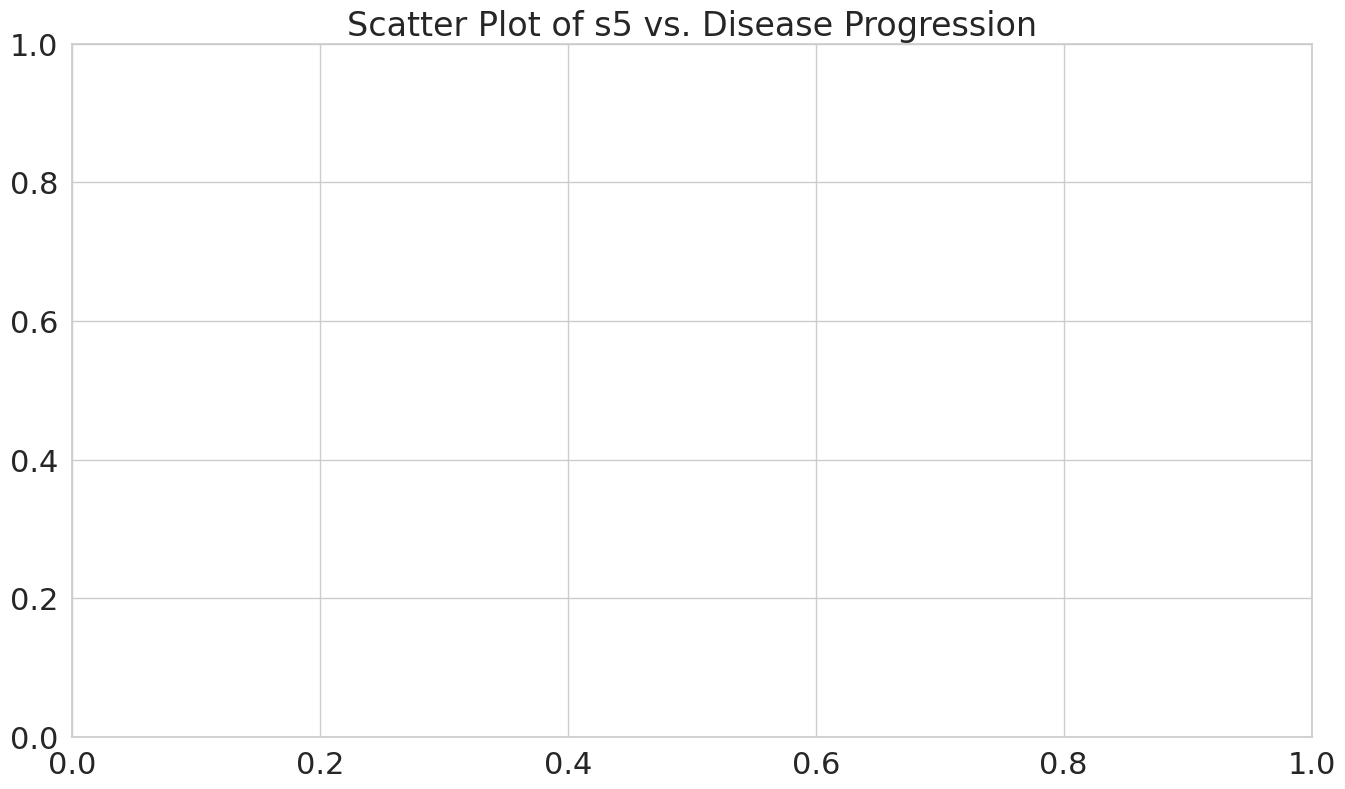

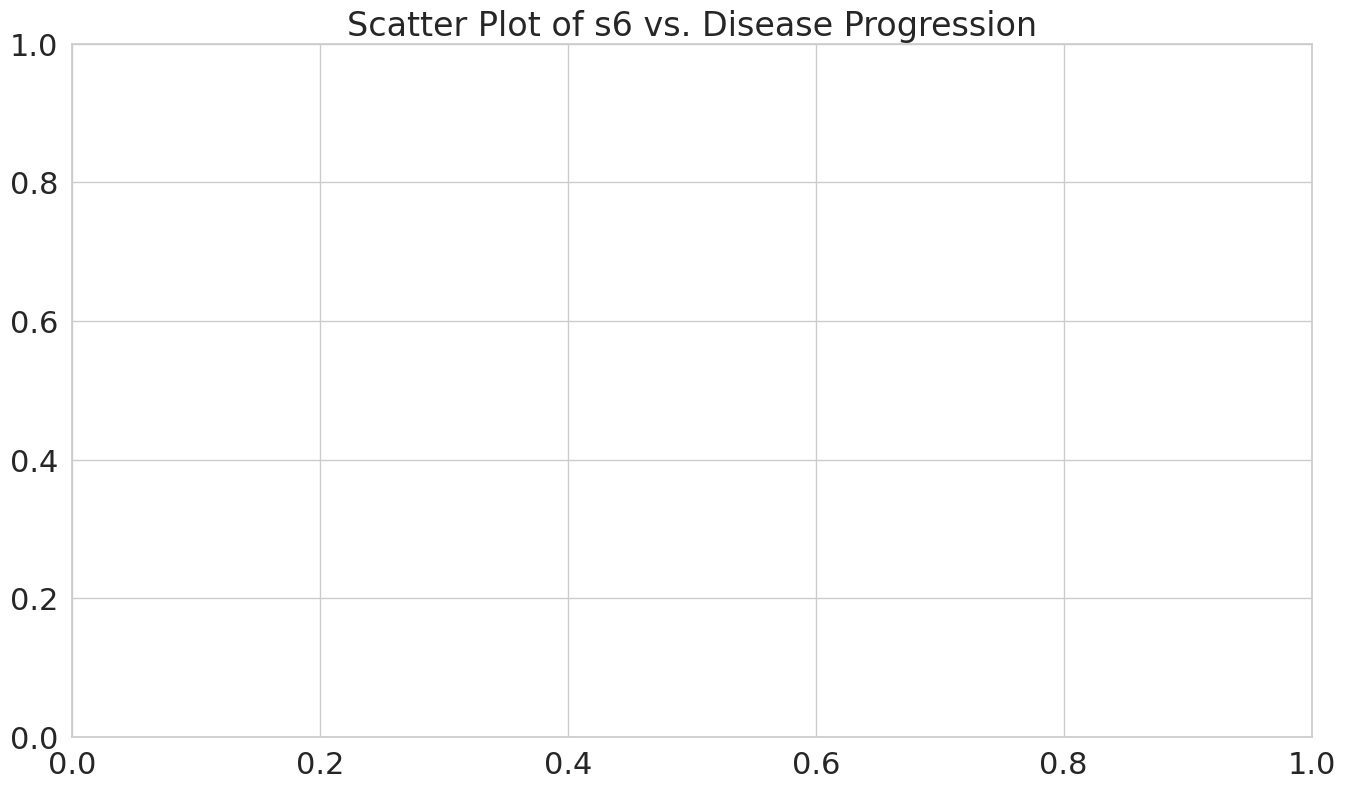

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in diabetes_data.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature, y='DiseaseProgression', hue='DiseaseProgression', palette='cool', legend=False)
    plt.title(f"Scatter Plot of {feature} vs. Disease Progression")

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test= train_test_split(diabetes_data.data, diabetes_data.target, random_state=11)

In [66]:
X_train.shape

(331, 10)

In [67]:
X_test.shape

(111, 10)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linear_regression=LinearRegression()

In [70]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [71]:
for i, name in enumerate(diabetes_data.feature_names):print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [72]:
linear_regression.intercept_

152.22822762230342

In [73]:
predicted=linear_regression.predict(X_test)

In [74]:
expected=y_test

In [75]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [76]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [77]:
df=pd.DataFrame()

In [78]:
df['Expected']=pd.Series(expected)

In [79]:
df['Predicted']=pd.Series(predicted)

In [80]:
figure=plt.figure(figsize=(9,9))

<Figure size 900x900 with 0 Axes>

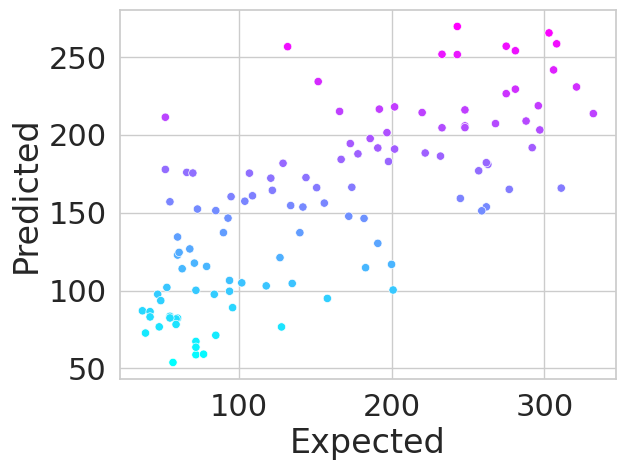

In [81]:
axes=sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

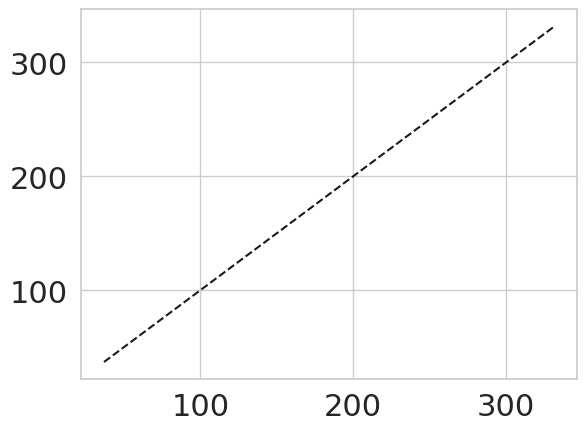

In [88]:
start=min(expected.min(), predicted.min())
end=max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line= plt.plot([start,end],[start,end], 'k--')


In [89]:
from sklearn import metrics

In [90]:
metrics.r2_score(expected, predicted)

0.5322429620529407

In [91]:
metrics.mean_squared_error(expected, predicted)

3458.2307025173577

In [92]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [93]:
estimators= {'LinearRegression': linear_regression, 'ElasticNet': ElasticNet(), 'Lasso': Lasso(), 'Ridge': Ridge() }

In [95]:
from sklearn.model_selection import KFold, cross_val_score

In [97]:
for estimator_name, estimator_object in estimators.items():
    kfold=KFold(n_splits=10, random_state=11, shuffle=True)
    scores=cross_val_score(estimator=estimator_object,
     X=diabetes_data.data, y=diabetes_data.target, cv=kfold,
                           scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores= {scores.mean():.3f}')

LinearRegression: mean of r2 scores= 0.475
      ElasticNet: mean of r2 scores= -0.002
           Lasso: mean of r2 scores= 0.339
           Ridge: mean of r2 scores= 0.421
